# Project: Wrangling and Analyze Data

## Introduction

Project to display the method and skills used and acquired in the Course of Data Wrangling 

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import requests
from functools import reduce
from datetime import datetime
import tweepy 
import json 
import re
import seaborn as sns

## Data Gathering

**1.Twitter archive data WeRateDogs**

Downloaded the file manually provided by Udacity and uploading it to the Juypter Notebook Env

In [2]:
# load twitter archive
twitter_archive = pd.read_csv("twitter-archive-enhanced.csv")
# use tweet id column as index 
#why tweet_id as index--> will explain after Data Gathering for three sources is done
twitter_archive.set_index("tweet_id", inplace = True)

twitter_archive.head(3)

,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
tweet_id,,,,,,,,,,,,,,,,
892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


In [3]:
# shape of dataframe
twitter_archive.shape

(2356, 16)

In [4]:
# summary of dataframe and finding the NaN values and the data types
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 892420643555336193 to 666020888022790149
Data columns (total 16 columns):
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(2), object(10)
memory usa

**2. Image Prediction Data Gathering Source**

Use the Requests library to download the tweet image prediction (image_predictions.tsv)**

This file (image_predictions.tsv) is present in each tweet according to a neural network. It is hosted on Udacity's servers and should be downloaded programmatically using the Requests library and the following URL: https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv

In [5]:
# url
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
# 'wb' writing binary to make sure data is written correctly
with open('image-predictions.tsv' , 'wb') as file:
    predictions = requests.get(url)
    file.write(predictions.content)
    
# load image predictions
# '\t' because tsv is tab-seperated values
image_prediction = pd.read_csv('image-predictions.tsv', sep = '\t')

# use tweet id column as index
image_prediction.set_index("tweet_id", inplace = True)

image_prediction.head(3)

,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
tweet_id,,,,,,,,,,,
666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True


In [6]:
#shape of dataframe
image_prediction.shape

(2075, 11)

In [7]:
# summary of dataframe and finding the NaN values and the data types
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 666020888022790149 to 892420643555336193
Data columns (total 11 columns):
jpg_url    2075 non-null object
img_num    2075 non-null int64
p1         2075 non-null object
p1_conf    2075 non-null float64
p1_dog     2075 non-null bool
p2         2075 non-null object
p2_conf    2075 non-null float64
p2_dog     2075 non-null bool
p3         2075 non-null object
p3_conf    2075 non-null float64
p3_dog     2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(4)
memory usage: 152.0+ KB


**3. Gather Data from Twitter API 'tweet-json.txt'**

Manually downloaded the 'tweet-json.txt' file.
Querying twitter API to extract tweet id, favorite count and retweet count.

**Why tweet_id column was used as index ?**
- All the three data sources have 'tweet_id' common, which leads to simplicitiy in merging the data sources if required so the tweet_id was used as index
- It can be used to merge dataframe in later section of the project

In [8]:
# load twitter API data
with open('tweet-json.txt') as f:
    twitter_api = pd.DataFrame((json.loads(line) for line in f), columns = ['id', 'favorite_count', 'retweet_count'])

# change column names
twitter_api.columns = ['tweet_id', 'favoritesCount', 'retweetsCount']
# use tweet id column as index
twitter_api.set_index('tweet_id', inplace = True)

twitter_api.head(3)

,favoritesCount,retweetsCount
tweet_id,,
892420643555336193,39467,8853
892177421306343426,33819,6514
891815181378084864,25461,4328


In [9]:
#shape of dataframe
twitter_api.shape

(2354, 2)

In [10]:
# summary of dataframe and finding the NaN values and the data types
twitter_api.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2354 entries, 892420643555336193 to 666020888022790149
Data columns (total 2 columns):
favoritesCount    2354 non-null int64
retweetsCount     2354 non-null int64
dtypes: int64(2)
memory usage: 55.2 KB


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



## Assessing Data

**1. Twitte Archeive Data WeRateDogs**

In [11]:
# visual assessing the data
twitter_archive.head(50)

,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
tweet_id,,,,,,,,,,,,,,,,
892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None


In [12]:
# NaN Values and data types of columns
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 892420643555336193 to 666020888022790149
Data columns (total 16 columns):
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(2), object(10)
memory usa

In [13]:
# check for unique the twitter_id
num_duplicate_indices = sum(twitter_archive.index.duplicated())
print("Number of duplicate Twitter ID:", num_duplicate_indices)

Number of duplicate Twitter ID: 0


In [14]:
num_nan_value_retweet = pd.isna(twitter_archive['retweeted_status_id']).sum()

print("Sum of NaN (missing) values in 'retweeted_status_id':", num_nan_value_retweet)

Sum of NaN (missing) values in 'retweeted_status_id': 2175


In [15]:
num_retweets = np.isfinite(twitter_archive.retweeted_status_id).sum()
print("Sum of retweets(non-missing) in 'retweeted_status_id':", num_retweets)

Sum of retweets(non-missing) in 'retweeted_status_id': 181


In [16]:
#check expanded_urls
more_expanded_urls = twitter_archive[twitter_archive.expanded_urls.str.contains(',', na=False)].expanded_urls.count()

print("Number of tweets with two or more URLs in 'expanded_urls' column:", more_expanded_urls)


Number of tweets with two or more URLs in 'expanded_urls' column: 639


In [17]:
# check expanded urls
twitter_archive[~twitter_archive.expanded_urls.str.startswith(('https://twitter.com','http://twitter.com', 'https://vine.co'), na=False)].head(3)[['text','expanded_urls']]

,text,expanded_urls
tweet_id,,
890971913173991426,Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht..."
886736880519319552,This is Mingus. He's a wonderful father to his...,"https://www.gofundme.com/mingusneedsus,https:/..."
886267009285017600,@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN


In [18]:
# inspecting the text column values to values in rating_numerator. 
original_max_colwidth = pd.get_option('max_colwidth')
pd.set_option('max_colwidth', 200)

pattern = r"(\d+\.\d*\/\d+)"
text_with_rating = twitter_archive[twitter_archive['text'].apply(lambda text: bool(re.search(pattern, text, re.IGNORECASE)))][['text', 'rating_numerator', 'rating_denominator']]

# Display the result with the 'text' column untruncated
text_with_rating.head(3)

,text,rating_numerator,rating_denominator
tweet_id,,,
883482846933004288,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",5,10
832215909146226688,"RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",75,10
786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75,10


#### Example: 
twitter_id: 883482846933004288                           
This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. **13.5/10** https://t.co/qjrljjt948 

This is text column value and it contains **13.5/10** inside.
For same value of rating numerator we can the value being **5** and rating denominator value being 10.
#### The values in rating_numerator misinterpretated

In [19]:
# check rating numerator
twitter_archive.rating_numerator.value_counts().sort_index(ascending = False)

1776      1
960       1
666       1
420       2
204       1
182       1
165       1
144       1
143       1
121       1
99        1
88        1
84        1
80        1
75        2
60        1
50        1
45        1
44        1
27        1
26        1
24        1
20        1
17        1
15        2
14       54
13      351
12      558
11      464
10      461
9       158
8       102
7        55
6        32
5        37
4        17
3        19
2         9
1         9
0         2
Name: rating_numerator, dtype: int64

In [20]:
#check for rating_denominator
twitter_archive.rating_denominator.value_counts().sort_index(ascending = False)

170       1
150       1
130       1
120       1
110       1
90        1
80        2
70        1
50        3
40        1
20        2
16        1
15        1
11        3
10     2333
7         1
2         1
0         1
Name: rating_denominator, dtype: int64

In [21]:
#names of dogs
twitter_archive.name.value_counts()

None        745
a            55
Charlie      12
Lucy         11
Cooper       11
Oliver       11
Penny        10
Tucker       10
Lola         10
Bo            9
Winston       9
the           8
Sadie         8
Toby          7
an            7
Bailey        7
Daisy         7
Buddy         7
Rusty         6
Jax           6
Oscar         6
Stanley       6
Bella         6
Scout         6
Milo          6
Koda          6
Jack          6
Leo           6
Dave          6
Sammy         5
           ... 
Rinna         1
Carll         1
Adele         1
Tripp         1
Spanky        1
Buckley       1
Dido          1
Banditt       1
Rolf          1
Ivar          1
Tiger         1
Einstein      1
Flurpson      1
Franq         1
Dixie         1
Maya          1
Jarod         1
Dobby         1
Siba          1
Zeus          1
Bert          1
Duchess       1
Leonidas      1
Petrick       1
Grizzie       1
Sandra        1
Ike           1
Dallas        1
Bobb          1
Stu           1
Name: name, Length: 957,

In [22]:
# check if dogs have more than one category assigned
categories = ['doggo', 'floofer', 'pupper', 'puppo']

for category in categories:
    twitter_archive[category] = twitter_archive[category].apply(lambda x: 0 if x == 'None' else 1)

twitter_archive['number_categories'] = twitter_archive.loc[:,categories].sum(axis = 1)

In [23]:
# count where the dog is assigned more than one category
print("Occurrences where dog was categorized more than once:", (twitter_archive['number_categories'] > 1).sum())

Occurrences where dog was categorized more than once: 14


In [24]:
# dogs assigned to each categories
twitter_archive['number_categories'].value_counts()

0    1976
1     366
2      14
Name: number_categories, dtype: int64

### Quality issues in Twitter Archive Data

1. Removing columns not required for wrangling and analysis. 
2. Many replied tweets removing and many tweets are retweets
3. Both two timestamp columns in the dataframe 'timestamp' and 'retweeted_status_timestamp' better to have in DateTime.
4. Rating read from text of tweets and misinterpreted value of from text column of the dataframe
5. Denominator and numerator rating correction depending on respective ratings

### Tideness Issues in the data
1. Dogs categorized into more than one categories and dogs classification should be in one column instead of being binary
2. Expanded_urls contains more than one URL and some missing URLs

**2.Image Prediction Data**

In [25]:
# visual assessing the dataframe
image_prediction.head(50)

,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
tweet_id,,,,,,,,,,,
666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True


In [26]:
# NaN and data types of the dataframe
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 666020888022790149 to 892420643555336193
Data columns (total 11 columns):
jpg_url    2075 non-null object
img_num    2075 non-null int64
p1         2075 non-null object
p1_conf    2075 non-null float64
p1_dog     2075 non-null bool
p2         2075 non-null object
p2_conf    2075 non-null float64
p2_dog     2075 non-null bool
p3         2075 non-null object
p3_conf    2075 non-null float64
p3_dog     2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(4)
memory usage: 152.0+ KB


In [27]:
# check for unique the twitter_id
duplicate_image_prediction = sum(image_prediction.index.duplicated())
print("Number of duplicate Twitter ID:", duplicate_image_prediction)

Number of duplicate Twitter ID: 0


In [28]:
# Check jpg_url for duplicates
print('Duplicate jpg_url in the dataframe:',sum(image_prediction.jpg_url.duplicated()))

Duplicate jpg_url in the dataframe: 66


In [29]:
# checking if jpg_url has valid image extension and counting occurence of the extension in jpg_url
extension_counts = image_prediction['jpg_url'].str.extract(r'\.([a-zA-Z]+)$')[0].value_counts()

# Display the result
print("Counts of different extensions used in 'jpg_url':")
print(extension_counts)

Counts of different extensions used in 'jpg_url':
jpg    2073
png       2
Name: 0, dtype: int64


In [30]:
print('Img_num Value Count:')
print(image_prediction.img_num.value_counts())

Img_num Value Count:
1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64


In [31]:
image_prediction.p1.head(3)

tweet_id
666020888022790149    Welsh_springer_spaniel
666029285002620928                   redbone
666033412701032449           German_shepherd
Name: p1, dtype: object

In [32]:
image_prediction.p1_dog.count()

2075

In [33]:
image_prediction.p1_dog.value_counts()

True     1532
False     543
Name: p1_dog, dtype: int64

In [34]:
image_prediction.p2_dog.value_counts()

True     1553
False     522
Name: p2_dog, dtype: int64

In [35]:
image_prediction.p3_dog.value_counts()

True     1499
False     576
Name: p3_dog, dtype: int64

### Quality issues in Image Prediction Data

6. Twitter Archive Data and Image Prediction Data have different rows, needs to be merged with Twitter Archive Data
7. Prediction Columns P, P1_dog and P1_conf and for P2 and P3 likely, column names are confusing and provide no insights about the values in those oclumns


### Tideness Issues
3. Duplicated URLs are present in jpg_url column
4. Dog prediction contains underscore e.g. 'Siberian_husky', 'giant_schnauzer'
5. Image prediction

**3.Twitter API Data**

In [36]:
# assessing twitter api data visually
twitter_api.head(50)

,favoritesCount,retweetsCount
tweet_id,,
892420643555336193,39467,8853
892177421306343426,33819,6514
891815181378084864,25461,4328
891689557279858688,42908,8964
891327558926688256,41048,9774
891087950875897856,20562,3261
890971913173991426,12041,2158
890729181411237888,56848,16716
890609185150312448,28226,4429


In [37]:
# NaN and datatype of the dataframe
twitter_api.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2354 entries, 892420643555336193 to 666020888022790149
Data columns (total 2 columns):
favoritesCount    2354 non-null int64
retweetsCount     2354 non-null int64
dtypes: int64(2)
memory usage: 55.2 KB


In [38]:
# shape of the dataframe
twitter_api.shape

(2354, 2)

### Quality issues in Twitter API Data

8. Twitter Archive Data and Twitter API Data have different rows, needs to be merged with Twitter Archive Data.

### Summary of Assessing Data

There are 8 quality issues and 5 tideness issues figured out from the three data sources (Twitter Archive Data, Image Prediction Data and Twitter API Data)

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

#### 1. Twitter Archive Data

In [39]:
# create a copy of twitter archive dataset
twitter_archive_clean = twitter_archive.copy()
twitter_archive_clean.head(3)

,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,number_categories
tweet_id,,,,,,,,,,,,,,,,,
892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,0,0,0,0,0
892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,0,0,0,0,0
891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,0,0,0,0,0


In [40]:
twitter_archive_clean.shape

(2356, 17)

### Issue #1:
#### Define: 

Replied tweets removing and many tweets are retweets. Removing retweeted_status_id will be done by removing the column itself

#### Code

In [41]:
# drop retweets                                                 
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean['retweeted_status_id'].isnull()]

#### Test

In [42]:
print('Retweetes and Replies in twitter archive:',sum(twitter_archive_clean.retweeted_status_user_id.value_counts()))

Retweetes and Replies in twitter archive: 0


### Issue #2:
#### Define: 

Removing columns not required for wrangling and analysis. 

#### Code

In [43]:
# display all columns
twitter_archive_clean.columns

Index(['in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp', 'source',
       'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'number_categories'],
      dtype='object')

In [44]:
# drop unnecessary columns
twitter_archive_clean.drop(['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id',
           'retweeted_status_user_id','retweeted_status_timestamp'], axis = 1, inplace = True)

In [45]:
twitter_archive_clean.shape

(2175, 12)

#### Test

In [46]:
# display all columns
twitter_archive_clean.columns

Index(['timestamp', 'source', 'text', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'number_categories'],
      dtype='object')

In [47]:
# unnecessary columns are dropped
twitter_archive_clean.shape

(2175, 12)

### Issue #3:
#### Define: 

Both two timestamp columns in the dataframe 'timestamp' and 'retweeted_status_timestamp' better to have in DateTime. Though 'retweeted_status_timestamp' is already removed from the dataframe as not required for analysis but being a timestamp containing column the datatype should be in DateTime(normally but also depends on the use-case). 

#### Code

In [48]:
# convert to datetime
twitter_archive_clean.timestamp = pd.to_datetime(twitter_archive_clean.timestamp)

#### Test

In [49]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 892420643555336193 to 666020888022790149
Data columns (total 12 columns):
timestamp             2175 non-null datetime64[ns]
source                2175 non-null object
text                  2175 non-null object
expanded_urls         2117 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
doggo                 2175 non-null int64
floofer               2175 non-null int64
pupper                2175 non-null int64
puppo                 2175 non-null int64
number_categories     2175 non-null int64
dtypes: datetime64[ns](1), int64(7), object(4)
memory usage: 220.9+ KB


### Issue #4:
#### Define: 

Dogs categorized into more than one categories and dogs classification should be in one column instead of being binary.

Dog Classification should be done in 4 categories which are as follows
 - Doggo
 - Floofer
 - Pupper
 - Puppo
 
Many dogs are classified into more than one categories

#### Code

In [50]:
twitter_archive_clean.shape

(2175, 12)

In [51]:
twitter_archive_clean['dog_type'] = twitter_archive_clean['text'].str.extract(r'(puppo|pupper|doggo|floofer)', flags=re.IGNORECASE)

# Capitalize the first letter of the dog_type column
twitter_archive_clean['dog_type'] = twitter_archive_clean['dog_type'].str.title()

# Drop the old columns
twitter_archive_clean.drop(['puppo', 'pupper', 'doggo', 'floofer'], axis=1, inplace=True)

In [52]:
twitter_archive_clean.dog_type.value_counts()

Pupper     254
Doggo       89
Puppo       33
Floofer      9
Name: dog_type, dtype: int64

#### Test

In [53]:
# should have less columns
twitter_archive_clean.shape

(2175, 9)

In [54]:
twitter_archive_clean.head(3)

,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,number_categories,dog_type
tweet_id,,,,,,,,,
892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,0,NaN
892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,0,NaN
891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,0,NaN


### Issue #5:
#### Define:

Expanded_urls contains more than one URL and some missing URLs. The URL have a base_url just like Xing or LinkedIn, just examples. Using the base url and adding the tweet_id to it would land us to  correct URL's

#### Code

In [55]:
base_url = 'https://twitter.com/dog_rates/status/'
twitter_archive_clean['expanded_urls'] = base_url + twitter_archive_clean.index.astype(str)

#### Test

In [56]:
testing_rows = twitter_archive_clean.head(300)
expected_urls = [f'https://twitter.com/dog_rates/status/{index}' for index in testing_rows.index.astype(str)]

# Test the updated 'expanded_urls' values
assert (testing_rows['expanded_urls'] == expected_urls).all()

print("Test passed. 'expanded_urls' column is updated correctly.")

Test passed. 'expanded_urls' column is updated correctly.


### Issue #6:

#### Define: 

Misinterpreted value of rating from text column of the dataframe. Float Rating are taken into consdieration and those are incorrect values.

#### Code

In [57]:
twitter_archive_clean[twitter_archive_clean.text.str.contains(r'\d+\.\d+\/\d+')][['text','rating_denominator', 'rating_numerator']].head(3)

,text,rating_denominator,rating_numerator
tweet_id,,,
883482846933004288,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",10,5
786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",10,75
778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,10,27


In [58]:
# convert both columns to floats
twitter_archive_clean['rating_numerator'] = twitter_archive_clean['rating_numerator'].astype(float)
twitter_archive_clean['rating_denominator'] = twitter_archive_clean['rating_denominator'].astype(float)

# find columns with fractions
fraction_ratings = twitter_archive_clean[twitter_archive_clean.text.str.contains(r'\d+\.\d+\/\d+', na = False)].index

# extract correct rating and replace incorrect one
for index in fraction_ratings:
    rating = re.search('\d+\.\d+\/\d+', twitter_archive_clean.loc[index,:].text).group(0)
    twitter_archive_clean.at[index,'rating_numerator'], twitter_archive_clean.at[index,'rating_denominator'] = rating.split('/')

#### Test

In [59]:
# display rows of fixed data
twitter_archive_clean.loc[fraction_ratings,:][['text', 'rating_numerator','rating_denominator']].head(10)

,text,rating_numerator,rating_denominator
tweet_id,,,
883482846933004288,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",13.50,10.0
786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",9.75,10.0
778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,11.27,10.0
681340665377193984,I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,9.50,10.0
680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,11.26,10.0


### Issue #7:

#### Define: 

Denominator and numerator rating correction depending on respective ratings

In [60]:
# save index of tweets with denominator greater than 10
high_denominator_value = twitter_archive[twitter_archive.rating_denominator > 10].index

# display rows of data with denominator greater than 10
twitter_archive_clean.loc[high_denominator_value,:][['text', 'rating_numerator','rating_denominator']].head(50)

/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:1472: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


,text,rating_numerator,rating_denominator
tweet_id,,,
832088576586297345,@docmisterio account started on 11/15/15,11.0,15.0
820690176645140481,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84.0,70.0
775096608509886464,NaN,NaN,NaN
758467244762497024,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165.0,150.0
740373189193256964,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",9.0,11.0
731156023742988288,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204.0,170.0
722974582966214656,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,4.0,20.0
716439118184652801,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50.0,50.0
713900603437621249,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,99.0,90.0


The Numerator and Denominator values extracted from the 'text' column are incorrect interpreted for 20 rows in the dataframe. There are few cases of mis-interpreting the rating of numerator and denominator. I am listing them below and what would be the correct values for both rating and further assumption taken into consideration for values in rating columns.
There are 20 rows where the value of denominator is greater than 10

- for few rows, the rating extracted from 'text' in false e.g. for tweet-id:682962037429899265, rating taken is the date of being robbed and the actual rating follows after that value so code does not take that into consideration
    - Fix: Manual inserting values of the rating for numerator and denominator
- No presence of rating in the 'text' column for example tweet-id:832088576586297345
    - Fix: Insert value as zero for both
- There are ratings for a pack, example tweet-id: 713900603437621249 here it is mentioned there are 9 puppers and rating is 99/90 so assuming the rating is given for each dogs
    - Fix: dividing the numerator rating by denominator rating would gives us the rating for each dog in a pack which would be overall rating for the pack
    
Pack is group of dogs or puppies

In [61]:
count_high_denominator = (twitter_archive['rating_denominator'] > 10).sum()
print("Count where denominator is greater than 10:", count_high_denominator)

Count where denominator is greater than 10: 20


In [62]:
# Manually fixing the value of incorrect rating of numerator and denominator

twitter_archive_clean.loc[722974582966214656, 'rating_numerator'] = 13
twitter_archive_clean.loc[722974582966214656, 'rating_denominator'] = 10

twitter_archive_clean.loc[740373189193256964, 'rating_numerator'] = 14
twitter_archive_clean.loc[740373189193256964, 'rating_denominator'] = 10

twitter_archive_clean.loc[682962037429899265, 'rating_denominator'] = 10
twitter_archive_clean.loc[682962037429899265, 'rating_numerator'] = 10

twitter_archive_clean.loc[775096608509886464, 'rating_numerator'] = 14
twitter_archive_clean.loc[775096608509886464, 'rating_denominator'] = 10

twitter_archive_clean.loc[832088576586297345, 'rating_numerator'] = 0
twitter_archive_clean.loc[832088576586297345, 'rating_denominator'] = 0

twitter_archive_clean.loc[716439118184652801, 'rating_denominator'] = 10
twitter_archive_clean.loc[716439118184652801, 'rating_numerator'] = 11



In [63]:
# add normalized rating
twitter_archive_clean['overall_rating'] = twitter_archive_clean['rating_numerator'] / twitter_archive_clean['rating_denominator']

#### Test

In [64]:
twitter_archive_clean[['text','rating_denominator', 'rating_numerator', 'overall_rating']].head(3)

,text,rating_denominator,rating_numerator,overall_rating
tweet_id,,,,
892420643555336193,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,10.0,13.0,1.3
892177421306343426,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",10.0,13.0,1.3
891815181378084864,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,10.0,12.0,1.2


In [65]:
twitter_archive_clean.shape

(2176, 10)

#### 2. Image Predictions Data

In [66]:
# create a copy of dataset
image_prediction_clean = image_prediction.copy()

In [67]:
image_prediction_clean.head(3)

,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
tweet_id,,,,,,,,,,,
666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True


In [68]:
image_prediction_clean.shape

(2075, 11)

### Issue #8:
#### Define

Prediction Columns P, P1_dog and P1_conf and for P2 and P3 likely, column names are confusing and provide no insights about the values in those oclumns

#### Code

In [69]:
# display columns names
image_prediction_clean.columns

Index(['jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf',
       'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

In [70]:
# change labels
image_prediction_clean.columns = ['imageUrl', 
                            'imageNumber', 
                            '1stPrediction',
                            '1stPredictionConfidence',
                            '1stPredictionIsdog',
                            '2ndPrediction',
                            '2ndPredictionConfidence',
                            '2ndPredictionIsdog',
                            '3rdPrediction',
                            '3rdPredictionConfidence',
                            '3rdPredictionIsdog']

#### Test

In [71]:
# display new column names
image_prediction_clean.columns

Index(['imageUrl', 'imageNumber', '1stPrediction', '1stPredictionConfidence',
       '1stPredictionIsdog', '2ndPrediction', '2ndPredictionConfidence',
       '2ndPredictionIsdog', '3rdPrediction', '3rdPredictionConfidence',
       '3rdPredictionIsdog'],
      dtype='object')

In [72]:
image_prediction_clean

,imageUrl,imageNumber,1stPrediction,1stPredictionConfidence,1stPredictionIsdog,2ndPrediction,2ndPredictionConfidence,2ndPredictionIsdog,3rdPrediction,3rdPredictionConfidence,3rdPredictionIsdog
tweet_id,,,,,,,,,,,
666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True


### Issue #9:
#### Define

Duplicated URLs are present in jpg_url column

In [73]:
print('Sum of Duplicaterd URLs in imageUrl column:' ,sum(image_prediction_clean.imageUrl.duplicated()) )

Sum of Duplicaterd URLs in imageUrl column: 66


#### Code

In [74]:
image_prediction_clean = image_prediction_clean.drop_duplicates(subset=['imageUrl'], keep='last')

#### Test

In [75]:
print('Sum of Duplicaterd URLs in imageUrl column:' ,sum(image_prediction_clean.imageUrl.duplicated()) )

Sum of Duplicaterd URLs in imageUrl column: 0


### Issue #10:
#### Define:

Dog prediction contains underscore e.g. 'Siberian_husky', 'giant_schnauzer'

#### Code

In [76]:
# columns with dog breed
dog_breed_cols = ['1stPrediction', '2ndPrediction', '3rdPrediction']

# remove underscore and capitalize the first letter of each word 
for column in dog_breed_cols:
    image_prediction_clean[column] = image_prediction_clean[column].str.replace('_', ' ').str.title()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


#### Test

In [77]:
image_prediction_clean[dog_breed_cols].head(3)

,1stPrediction,2ndPrediction,3rdPrediction
tweet_id,,,
666020888022790149,Welsh Springer Spaniel,Collie,Shetland Sheepdog
666029285002620928,Redbone,Miniature Pinscher,Rhodesian Ridgeback
666033412701032449,German Shepherd,Malinois,Bloodhound


### Issue #11:
### Define: 

Image prediction Function:
Function Description: Function is designed to extract if predicted value is dog breed or not and its confidence level from the top three predictions in a DataFrame (P1,P2,P3), based on the boolean flags (1stPreductionIsdog,2ndPredictionIsdog,3rdPredictionIsdog) in the respective columns. If none of the top three predictions are considered dog breeds, it returns NaN for both the breed and the confidence level.


image_prediction_clean.columns = ['imageUrl', 
                            'imageNumber', 
                            '1stPrediction',
                            '1stPredictionConfidence',
                            '1stPredictionIsdog',
                            '2ndPrediction',
                            '2ndPredictionConfidence',
                            '2ndPredictionIsdog',
                            '3rdPrediction',
                            '3rdPredictionConfidence',
                            '3rdPredictionIsdog']

#### Code

In [78]:
# function
def get_breed(row):
    if row['1stPredictionIsdog'] == True:
        return row['1stPrediction'], row['1stPredictionConfidence']
    if row['2ndPredictionIsdog'] == True:
        return row['2ndPrediction'], row['2ndPredictionConfidence']
    if row['3rdPredictionIsdog'] == True:
        return row['3rdPrediction'], row['3rdPredictionConfidence']
    return np.nan, np.nan

In [79]:
image_prediction_clean[['breedPredicted', 'predictionConfidence']] = pd.DataFrame(image_prediction_clean.apply(lambda row: get_breed(row), axis = 1).tolist(), index = image_prediction_clean.index) 

/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:3140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [80]:
# drop old columns
image_prediction_clean.drop(['1stPrediction',
                       '1stPredictionConfidence',
                       '1stPredictionIsdog',
                       '2ndPrediction',
                       '2ndPredictionConfidence',
                       '2ndPredictionIsdog',
                       '3rdPrediction',
                       '3rdPredictionConfidence',
                       '3rdPredictionIsdog'],
                      axis=1, inplace=True)

# drop rows without dog breed prediction
image_prediction_clean.dropna(subset = ['breedPredicted', 'predictionConfidence'], inplace = True)

/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [81]:
image_prediction_clean.shape

(1691, 4)

#### 3. Twitte API Data

In [82]:
twitter_api.head(3)

,favoritesCount,retweetsCount
tweet_id,,
892420643555336193,39467,8853
892177421306343426,33819,6514
891815181378084864,25461,4328


In [83]:
twitter_api.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2354 entries, 892420643555336193 to 666020888022790149
Data columns (total 2 columns):
favoritesCount    2354 non-null int64
retweetsCount     2354 non-null int64
dtypes: int64(2)
memory usage: 55.2 KB


In [84]:
twitter_api.shape

(2354, 2)

#### Twitter API Data seems clean based on non-null values and those values being integer based on the column name

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [85]:
# merge all the three data source into a clean dataframe
df = reduce(lambda left, right: pd.merge(left, right, on='tweet_id'), [twitter_archive_clean, image_prediction_clean, twitter_api])

In [86]:
#Store the clean DataFrame in a CSV file
df.to_csv('twitter_archive_master.csv')

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [87]:
df.shape

(1626, 16)

In [88]:
df.head(3)

,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,number_categories,dog_type,overall_rating,imageUrl,imageNumber,breedPredicted,predictionConfidence,favoritesCount,retweetsCount
tweet_id,,,,,,,,,,,,,,,,
892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426,13.0,10.0,Tilly,0.0,NaN,1.3,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,33819,6514
891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864,12.0,10.0,Archie,0.0,NaN,1.2,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,25461,4328
891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688,13.0,10.0,Darla,0.0,NaN,1.3,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,Labrador Retriever,0.168086,42908,8964


In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1626 entries, 892177421306343426 to 666020888022790149
Data columns (total 16 columns):
timestamp               1626 non-null datetime64[ns]
source                  1626 non-null object
text                    1626 non-null object
expanded_urls           1626 non-null object
rating_numerator        1626 non-null float64
rating_denominator      1626 non-null float64
name                    1626 non-null object
number_categories       1626 non-null float64
dog_type                279 non-null object
overall_rating          1626 non-null float64
imageUrl                1626 non-null object
imageNumber             1626 non-null int64
breedPredicted          1626 non-null object
predictionConfidence    1626 non-null float64
favoritesCount          1626 non-null int64
retweetsCount           1626 non-null int64
dtypes: datetime64[ns](1), float64(5), int64(3), object(7)
memory usage: 216.0+ KB


In [90]:
df.describe()

,rating_numerator,rating_denominator,number_categories,overall_rating,imageNumber,predictionConfidence,favoritesCount,retweetsCount
count,1626.000000,1626.000000,1626.000000,1626.000000,1626.000000,1626.000000,1626.000000,1626.000000
mean,11.391009,10.522140,0.159287,1.081431,1.216482,0.550305,8603.169127,2555.534440
std,8.021945,7.000207,0.379266,0.187995,0.577420,0.300083,11700.108745,4301.337243
min,0.000000,2.000000,0.000000,0.000000,1.000000,0.000010,81.000000,16.000000
25%,10.000000,10.000000,0.000000,1.000000,1.000000,0.302321,2091.250000,622.250000
50%,11.000000,10.000000,0.000000,1.100000,1.000000,0.550604,4162.500000,1363.000000
75%,12.000000,10.000000,0.000000,1.200000,1.000000,0.822939,10857.250000,2992.500000
max,165.000000,150.000000,2.000000,3.428571,4.000000,0.999956,132810.000000,79515.000000


The Statistics draws attention to many points which are described as follows:

- Most common numerator/denominator rating is 11/10
- Prediction of dog breed is approx. 50%
- Average retweets counts is 2799
- Favorite tweets count of weratedogs page is 8277

### Insights:

**1.Most Common Dog breed**

This information is extracted from image prediction data and merged with twitter archive data. 

In [91]:
df['breedPredicted'].value_counts()

Golden Retriever                  143
Labrador Retriever                103
Pembroke                           94
Chihuahua                          87
Pug                                60
Toy Poodle                         50
Chow                               45
Pomeranian                         42
Samoyed                            38
Malamute                           32
Chesapeake Bay Retriever           31
French Bulldog                     30
Cocker Spaniel                     26
Miniature Pinscher                 24
Eskimo Dog                         22
German Shepherd                    21
Staffordshire Bullterrier          20
Siberian Husky                     20
Shih-Tzu                           20
Rottweiler                         19
Shetland Sheepdog                  19
Cardigan                           19
Beagle                             19
Maltese Dog                        19
Kuvasz                             18
Lakeland Terrier                   17
Basset      

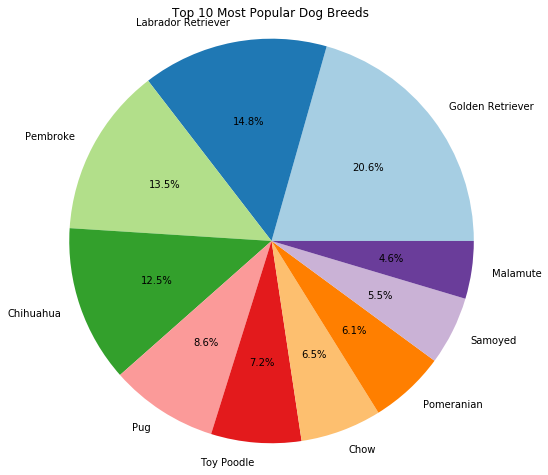

In [92]:
dog_breeds_counts = df['breedPredicted'].value_counts()
top_10_dog_breeds = dog_breeds_counts.nlargest(10)

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(top_10_dog_breeds.values, labels=top_10_dog_breeds.index, autopct='%1.1f%%', colors=plt.cm.Paired.colors)
plt.title('Top 10 Most Popular Dog Breeds')
plt.axis('equal')  # Equal aspect ratio ensures the pie is drawn as a circle.

plt.show()

In [93]:
smallest_10_dog_breeds = dog_breeds_counts.nsmallest(10)

print(smallest_10_dog_breeds)

Standard Schnauzer      1
Silky Terrier           1
Entlebucher             1
Japanese Spaniel        1
Clumber                 1
Irish Wolfhound         1
Scotch Terrier          1
Bouvier Des Flandres    1
Groenendael             2
Afghan Hound            2
Name: breedPredicted, dtype: int64


- Golden Retriever, Labrador Retriever and Pembroke are most popular dog breeds and cover most market share from all breeds of dog
- Silky Terrier, Scotch Terrier and Entlebeucher are least popular dog breeds

**2.Count of Dog Types**

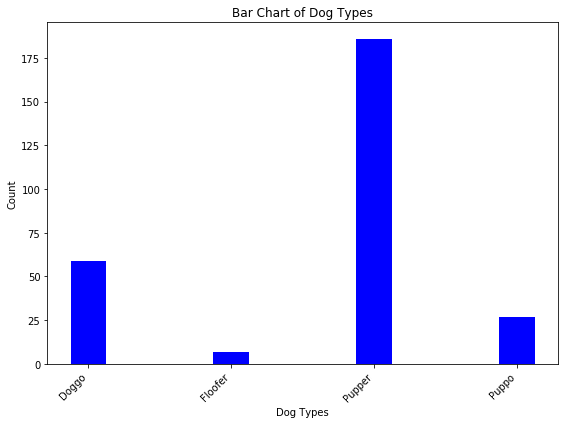

In [94]:
dog_types = df['dog_type'].value_counts()

# Create the bar chart
plt.figure(figsize=(8, 6))
plt.bar(dog_types.index, dog_types.values, width=0.25, color='blue')
plt.xlabel('Dog Types')
plt.ylabel('Count')
plt.title('Bar Chart of Dog Types')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Pupper is surely the most common dog types followed by Doggo, Puppo and Floofer

**3.Average Rating of Dog Breeds**

In [95]:
df_dog_breed_avg = df.groupby('breedPredicted').mean()
df_dog_breed_avg.head(3)

,rating_numerator,rating_denominator,number_categories,overall_rating,imageNumber,predictionConfidence,favoritesCount,retweetsCount
breedPredicted,,,,,,,,
Afghan Hound,8.000000,10.0,0.000000,0.800000,1.000000,0.513621,12191.500000,3602.5000
Airedale,9.833333,10.0,0.083333,0.983333,1.166667,0.583771,5280.833333,1393.7500
American Staffordshire Terrier,10.312500,10.0,0.187500,1.031250,1.187500,0.527359,9380.187500,2310.8125


In [96]:
df_dog_breed = df_dog_breed_avg['overall_rating'].sort_values()

In [97]:
df_dog_breed

breedPredicted
Japanese Spaniel               0.500000
Afghan Hound                   0.800000
Soft-Coated Wheaten Terrier    0.880000
Scotch Terrier                 0.900000
Walker Hound                   0.900000
Tibetan Terrier                0.925000
Dalmatian                      0.927273
Boston Bull                    0.941667
Welsh Springer Spaniel         0.950000
Saint Bernard                  0.950000
Maltese Dog                    0.952632
Dandie Dinmont                 0.957143
Norwich Terrier                0.960000
Miniature Schnauzer            0.960000
Redbone                        0.966667
English Setter                 0.971429
Scottish Deerhound             0.975000
Rhodesian Ridgeback            0.975000
Irish Terrier                  0.980000
Airedale                       0.983333
Papillon                       0.983333
Newfoundland                   0.985714
Mexican Hairless               0.985714
Miniature Poodle               0.987500
Miniature Pinscher       

**4.Dogs overall rating over time**

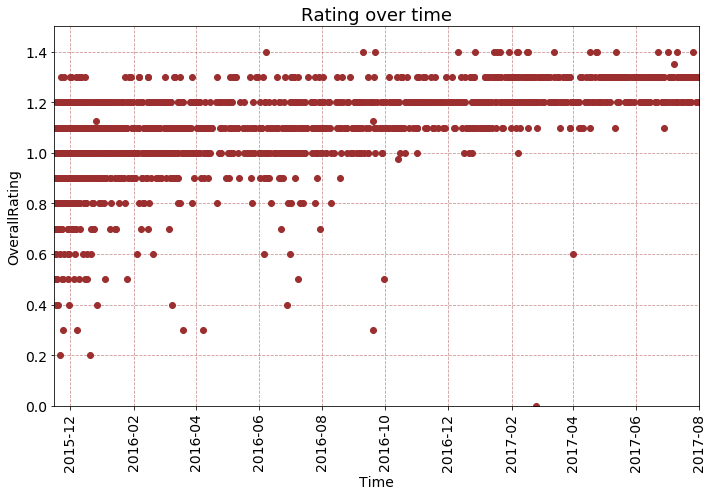

In [98]:


# Create the line plot for 'overall_rating' over time
plt.figure(figsize=(10, 7))

plt.grid(which='major', axis='both', linestyle='--', alpha=0.5, color="#9b2e2e")

plt.yticks(fontsize=14)
plt.xticks(fontsize=14, rotation=90)

plt.xlim(df['timestamp'].min(), df['timestamp'].max())
plt.ylim(0, 1.5)

plt.plot(df['timestamp'], df['overall_rating'], marker='o', linestyle='', color="#9b2e2e")

plt.title("Rating over time", fontsize=18)
plt.xlabel("Time", fontsize=14)
plt.ylabel("OverallRating", fontsize=14)

plt.tight_layout()
plt.show()

#### WeRateDogs gave high rating to dogs with time

**5. WeRateDogs Twitter Handle Analysis over the time**

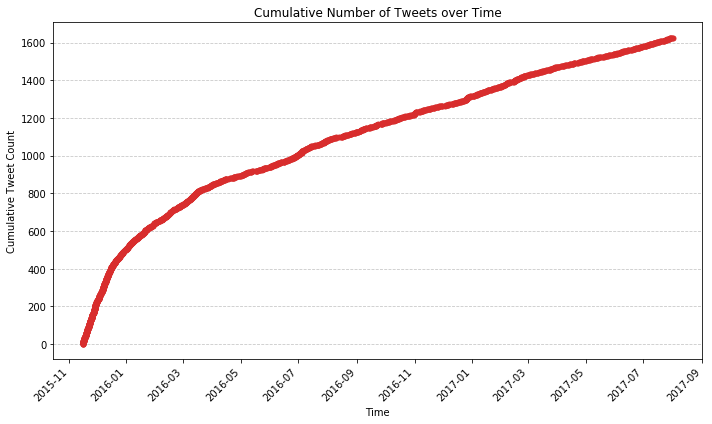

In [99]:
# Sort the DataFrame by 'timestamp' in ascending order
df.sort_values(by='timestamp', inplace=True)

# Create a Series with the cumulative count of tweets at each timestamp
tweet_counts_cumulative = df['timestamp'].value_counts().sort_index().cumsum()

# Create the line chart
plt.figure(figsize=(10, 6))
plt.plot(tweet_counts_cumulative.index, tweet_counts_cumulative.values, color="#d82d2d", marker='o', linestyle='-', markersize=5)
plt.xlabel('Time')
plt.ylabel('Cumulative Tweet Count')
plt.title('Cumulative Number of Tweets over Time')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

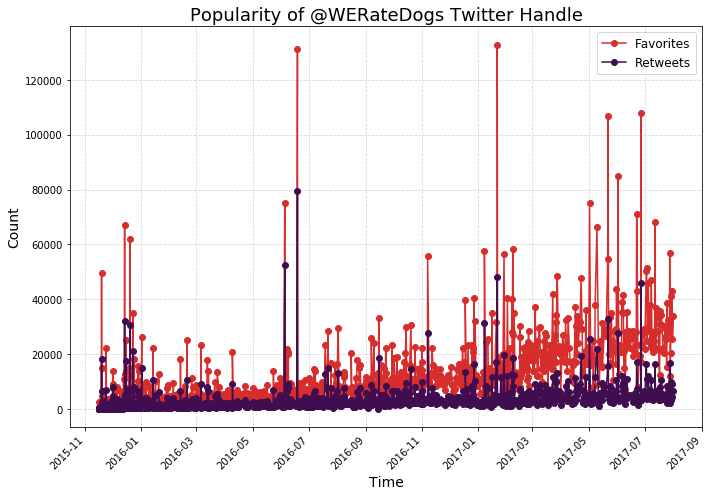

In [100]:
# Create the line plot for favorites and retweets over time
plt.figure(figsize=(10, 7))

plt.plot(df['timestamp'], df['favoritesCount'], label='Favorites', color="#d82d2d", marker='o', linestyle='-')
plt.plot(df['timestamp'], df['retweetsCount'], label='Retweets', color="#410d51", marker='o', linestyle='-')

plt.title('Popularity of @WERateDogs Twitter Handle', fontsize=18)
plt.xlabel('Time', fontsize=14)
plt.ylabel('Count', fontsize=14)

plt.grid(which='major', axis='both', linestyle='--', alpha=0.5)
plt.legend(fontsize=12)

plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

In the span of approx. 2 years, WeRateDogs page gained huge popularity as we can see in the above two plots. Trending twitter page considering retweets and favorites.
Cummalative increase in the tweets

PS: If there was more information about names would be intresting to see the names of the dog, would be funny as well. I tried but the dog names are very few and does not make sense to add it in the analysis

Appendix

In [101]:
df.name.value_counts()

None            404
a                46
Charlie          10
Cooper           10
Lucy             10
Oliver            9
Tucker            8
Winston           7
the               7
Daisy             7
Penny             7
Sadie             7
Koda              6
Jax               6
Toby              6
Bella             5
Leo               5
Stanley           5
Oscar             5
Lola              5
Gus               4
Cassie            4
Jack              4
Dexter            4
Brody             4
Duke              4
an                4
Scooter           4
Bailey            4
George            4
               ... 
Siba              1
Bert              1
Dug               1
Duchess           1
Petrick           1
Darla             1
Creg              1
unacceptable      1
Banditt           1
Tycho             1
Craig             1
Willem            1
Goose             1
Evy               1
Andru             1
Pumpkin           1
Beckham           1
officially        1
Grizz             1
